Simple Linear Regression

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [272]:
df = pd.read_csv('mtcars.csv')

In [273]:
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


finding relationship between mpg and cylinder

In [274]:
newdf = df.iloc[:,1:3]

In [275]:
newdf

,mpg,cyl
0,21.0,6
1,21.0,6
2,22.8,4
3,21.4,6
4,18.7,8
5,18.1,6
6,14.3,8
7,24.4,4
8,22.8,4
9,19.2,6


In [276]:
x = newdf['cyl'].to_numpy()

In [277]:
y = newdf['mpg'].to_numpy()

In [278]:
x = x.reshape(1,-1)
x = x.transpose()
x.shape

(32, 1)

In [279]:
y = y.reshape(1,-1)
y = y.transpose()
y.shape

(32, 1)

In [280]:
newdf.describe()

,mpg,cyl
count,32.000000,32.000000
mean,20.090625,6.187500
std,6.026948,1.785922
min,10.400000,4.000000
25%,15.425000,4.000000
50%,19.200000,6.000000
75%,22.800000,8.000000
max,33.900000,8.000000


In [281]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

In [282]:
x_train.shape

(25, 1)

In [283]:
y_train.shape

(25, 1)

#Change Data to 2D array 

Text(0, 0.5, 'MPG')

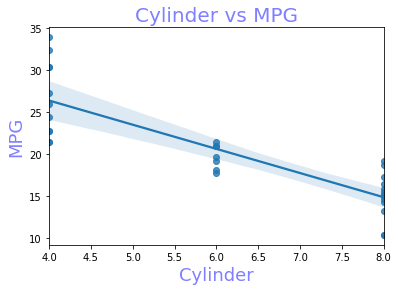

In [284]:
lmgraph=sns.regplot(x=x,y=y)
lmgraph.axes.set_title("Cylinder vs MPG",size=20,color='blue',alpha=0.5)
lmgraph.set_xlabel("Cylinder",size=18,color='blue',alpha=0.5)
lmgraph.set_ylabel("MPG",size=18,color='blue',alpha=0.5)

<AxesSubplot:>

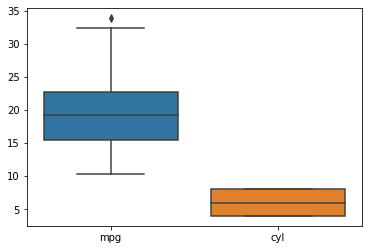

In [285]:
sns.boxplot(data=newdf)

In [286]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [287]:
reg.fit(x_train,y_train)

LinearRegression()

In [288]:
predict = reg.predict(x_test)

In [289]:
reg.intercept_

array([37.49858871])

In [290]:
reg.coef_

array([[-2.81340726]])

In [291]:
from sklearn import metrics;
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


R2: 0.67
Mean Absolute Error: 2.96
Mean Squared Error: 13.06
Root Mean Squared Error: 3.61


MLR 

In [292]:
mx = df.drop('model',axis =1)
mx

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [293]:
mx.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


<AxesSubplot:>

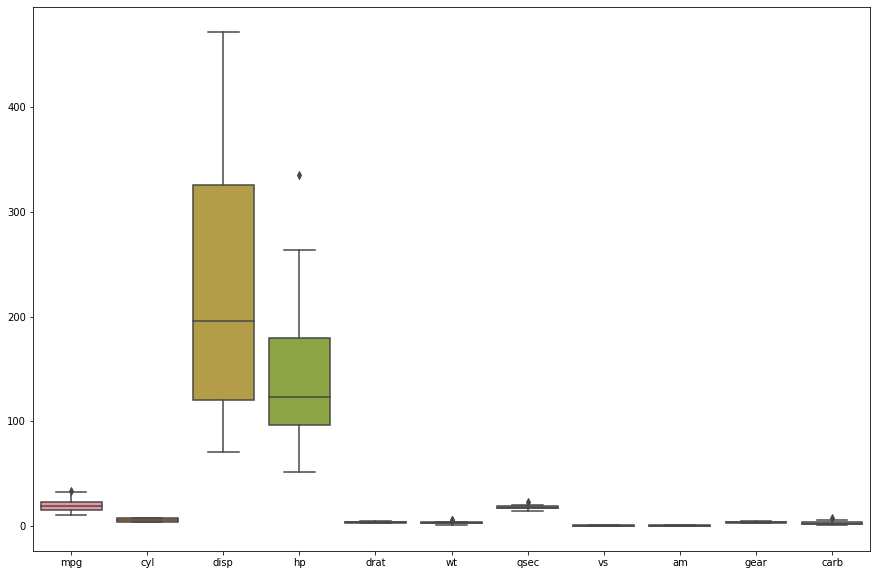

In [294]:
plt.figure(figsize=(15,10))
sns.boxplot(data=mx)

In [295]:
x1 = mx.drop('mpg',axis=1).to_numpy()

In [296]:
y1 = mx['mpg'].to_numpy()

In [297]:
x1

array([[  6.   , 160.   , 110.   ,   3.9  ,   2.62 ,  16.46 ,   0.   ,
          1.   ,   4.   ,   4.   ],
       [  6.   , 160.   , 110.   ,   3.9  ,   2.875,  17.02 ,   0.   ,
          1.   ,   4.   ,   4.   ],
       [  4.   , 108.   ,  93.   ,   3.85 ,   2.32 ,  18.61 ,   1.   ,
          1.   ,   4.   ,   1.   ],
       [  6.   , 258.   , 110.   ,   3.08 ,   3.215,  19.44 ,   1.   ,
          0.   ,   3.   ,   1.   ],
       [  8.   , 360.   , 175.   ,   3.15 ,   3.44 ,  17.02 ,   0.   ,
          0.   ,   3.   ,   2.   ],
       [  6.   , 225.   , 105.   ,   2.76 ,   3.46 ,  20.22 ,   1.   ,
          0.   ,   3.   ,   1.   ],
       [  8.   , 360.   , 245.   ,   3.21 ,   3.57 ,  15.84 ,   0.   ,
          0.   ,   3.   ,   4.   ],
       [  4.   , 146.7  ,  62.   ,   3.69 ,   3.19 ,  20.   ,   1.   ,
          0.   ,   4.   ,   2.   ],
       [  4.   , 140.8  ,  95.   ,   3.92 ,   3.15 ,  22.9  ,   1.   ,
          0.   ,   4.   ,   2.   ],
       [  6.   , 167.6  , 123.   ,   

In [298]:
y1

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

In [299]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=None)

In [300]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x2train = sc.fit_transform(x1_train)
x2_test = sc.transform(x1_test)

In [301]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x2train,y1_train)

LinearRegression()

In [302]:
predict2 = lr.predict(x2_test)

In [303]:
#Coefficents
print('\nIntercept: {:0.2f}'.format(float(lr.intercept_)))
coeff_table=pd.DataFrame(np.transpose(lr.coef_),mx.drop('mpg',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y1_test, predict2)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y1_test, predict2)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y1_test, predict2)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, predict2)))) 
print('rsm:{:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, predict2))))


Intercept: 20.41


      Coefficients
cyl       1.438905
disp      1.806745
hp        1.592652
drat      1.684089
wt       -4.776020
qsec      3.101458
vs       -0.480089
am        1.163071
gear      2.608198
carb     -1.600123

R2: -1.27
Mean Absolute Error: 4.39
Mean Squared Error: 32.34
Root Mean Squared Error: 5.69
rsm:5.69


In [304]:
predict3 = predict2.T


In [305]:
diff = predict3-y1_test
FcstTble=pd.DataFrame({'Actual':y1_test,'Predicted':predict3.round(1),'Difference':diff.round(1)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,22.8,31.1,8.3
1,13.3,13.9,0.6
2,15.8,26.6,10.8
3,22.8,27.0,4.2
4,15.0,19.3,4.3
